In [1]:
from generalPipeline import *

In [2]:
df_adapt = pd.read_csv('../../../Datasets/RQ2/react/react_adaptable_issues.csv')
df_consis = pd.read_csv('../../../Datasets/RQ2/react/react_consistent_issues.csv')    
df_intention = pd.read_csv('../../../Datasets/RQ2/react/react_intentional_issues.csv')

In [3]:
df_adapt.head()

,version,date,timestamp,security_issues_low,reliability_issues_low,maintainability_issues_low,total_debt_low,security_issues_medium,reliability_issues_medium,maintainability_issues_medium,total_debt_medium,security_issues_high,reliability_issues_high,maintainability_issues_high,total_debt_high
0,v0.3.0,2013-05-29,1369856771,0,0,0,0,0,0,13,225,0,0,87,26954
1,v0.3.3,2013-06-20,1371766458,0,0,0,0,0,0,13,225,0,0,87,27007
2,v0.4.0,2013-07-17,1374086011,0,0,0,0,0,0,12,210,0,0,88,27175
3,v0.4.1,2013-07-26,1374878032,0,0,0,0,0,0,12,210,0,0,88,27175
4,v0.4.2,2013-12-17,1387346417,0,0,0,0,0,0,12,210,0,0,88,27175


In [5]:
df = process_dataframes('react', df_adapt, df_consis, df_intention)
df.head()

d:\Semester\7th Semester\SWE 4701 (Software Metric)\Term Paper\Code\venv\Analysis-of-Code-Smell-and-Refactoring\Code\Analysis\RQ2\generalPipeline.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column_name].iloc[0] = df[column_name + '_total_debt_of_' + JSlibraryName].iloc[0]
d:\Semester\7th Semester\SWE 4701 (Software Metric)\Term Paper\Code\venv\Analysis-of-Code-Smell-and-Refactoring\Code\Analysis\RQ2\generalPipeline.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column_name].iloc[0] = df[column_name + '_total_debt_of_' + JSlibraryName].iloc[0]
d:\Semester\7th Semester\SWE 4701 (Software Metr

,version_of_react,date_of_react,timestamp_of_react,adaptability_total_debt_low_of_react,adaptability_total_debt_medium_of_react,adaptability_total_debt_high_of_react,adaptability_total_debt_of_react,adaptability_total_debt_difference_with_previous_version_of_react,consistency_total_debt_low_of_react,consistency_total_debt_medium_of_react,consistency_total_debt_high_of_react,consistency_total_debt_of_react,consistency_total_debt_difference_with_previous_version_of_react,intentionality_total_debt_low_of_react,intentionality_total_debt_medium_of_react,intentionality_total_debt_high_of_react,intentionality_total_debt_of_react,intentionality_total_debt_difference_with_previous_version_of_react
0,v0.3.0,2013-05-29,1369856771,0,225,26954,27179,27179.0,421,40,10,471,471.0,37,323,90,450,450.0
1,v0.3.3,2013-06-20,1371766458,0,225,27007,27232,53.0,421,40,10,471,0.0,37,328,80,445,-5.0
2,v0.4.0,2013-07-17,1374086011,0,210,27175,27385,153.0,421,40,10,471,0.0,5,32,445,482,37.0
3,v0.4.1,2013-07-26,1374878032,0,210,27175,27385,0.0,416,45,10,471,0.0,10,30,445,485,3.0
4,v0.4.2,2013-12-17,1387346417,0,210,27175,27385,0.0,416,45,10,471,0.0,10,30,445,485,0.0


In [6]:
def sumOfDiff(df, column_name):
    df_sum_of_diff = df[column_name].iloc[1:].sum()
    return df_sum_of_diff

In [8]:
df_adapt_sum = sumOfDiff(df, 'adaptability_total_debt_difference_with_previous_version_of_react')
df_consis_sum = sumOfDiff(df, 'consistency_total_debt_difference_with_previous_version_of_react')
df_intention_sum = sumOfDiff(df, 'intentionality_total_debt_difference_with_previous_version_of_react')

In [9]:
print(df_adapt_sum)
print(df_consis_sum)
print(df_intention_sum)

-24091.0
314.0
-287.0


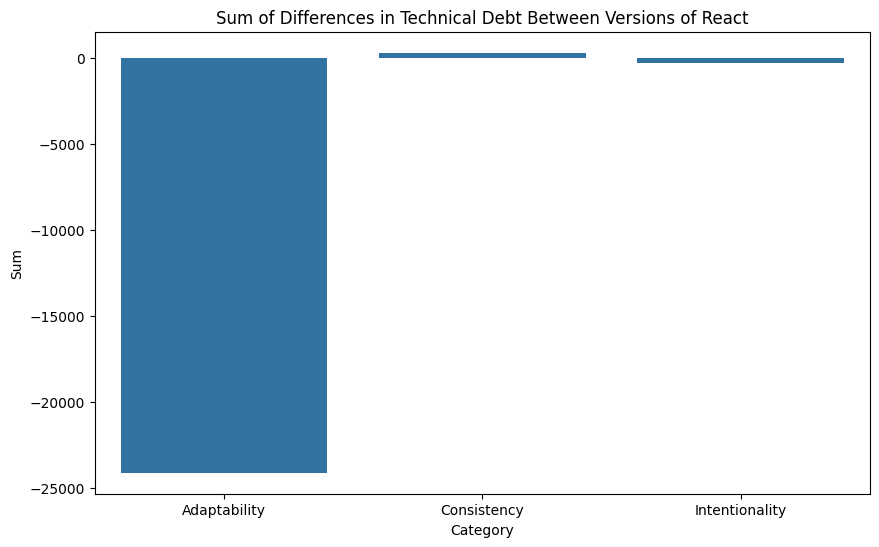

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the sums
df_sums = pd.DataFrame({
    'Category': ['Adaptability', 'Consistency', 'Intentionality'],
    'Sum': [df_adapt_sum, df_consis_sum, df_intention_sum]
})

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sum', data=df_sums)
plt.title('Sum of Differences in Technical Debt Between Versions of React')
plt.show()

C:\Users\sadik\AppData\Local\Temp\ipykernel_38728\3260765931.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[row, col_idx].set_xticklabels(axs[row, col_idx].get_xticklabels(), rotation=90)
C:\Users\sadik\AppData\Local\Temp\ipykernel_38728\3260765931.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[row, col_idx].set_xticklabels(axs[row, col_idx].get_xticklabels(), rotation=90)
C:\Users\sadik\AppData\Local\Temp\ipykernel_38728\3260765931.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[row, col_idx].set_xticklabels(axs[row, col_idx].get_xticklabels(), rotation=90)
C:\Users\sadik\AppData\Local\Temp\ipykernel_38728\3260765931.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. a

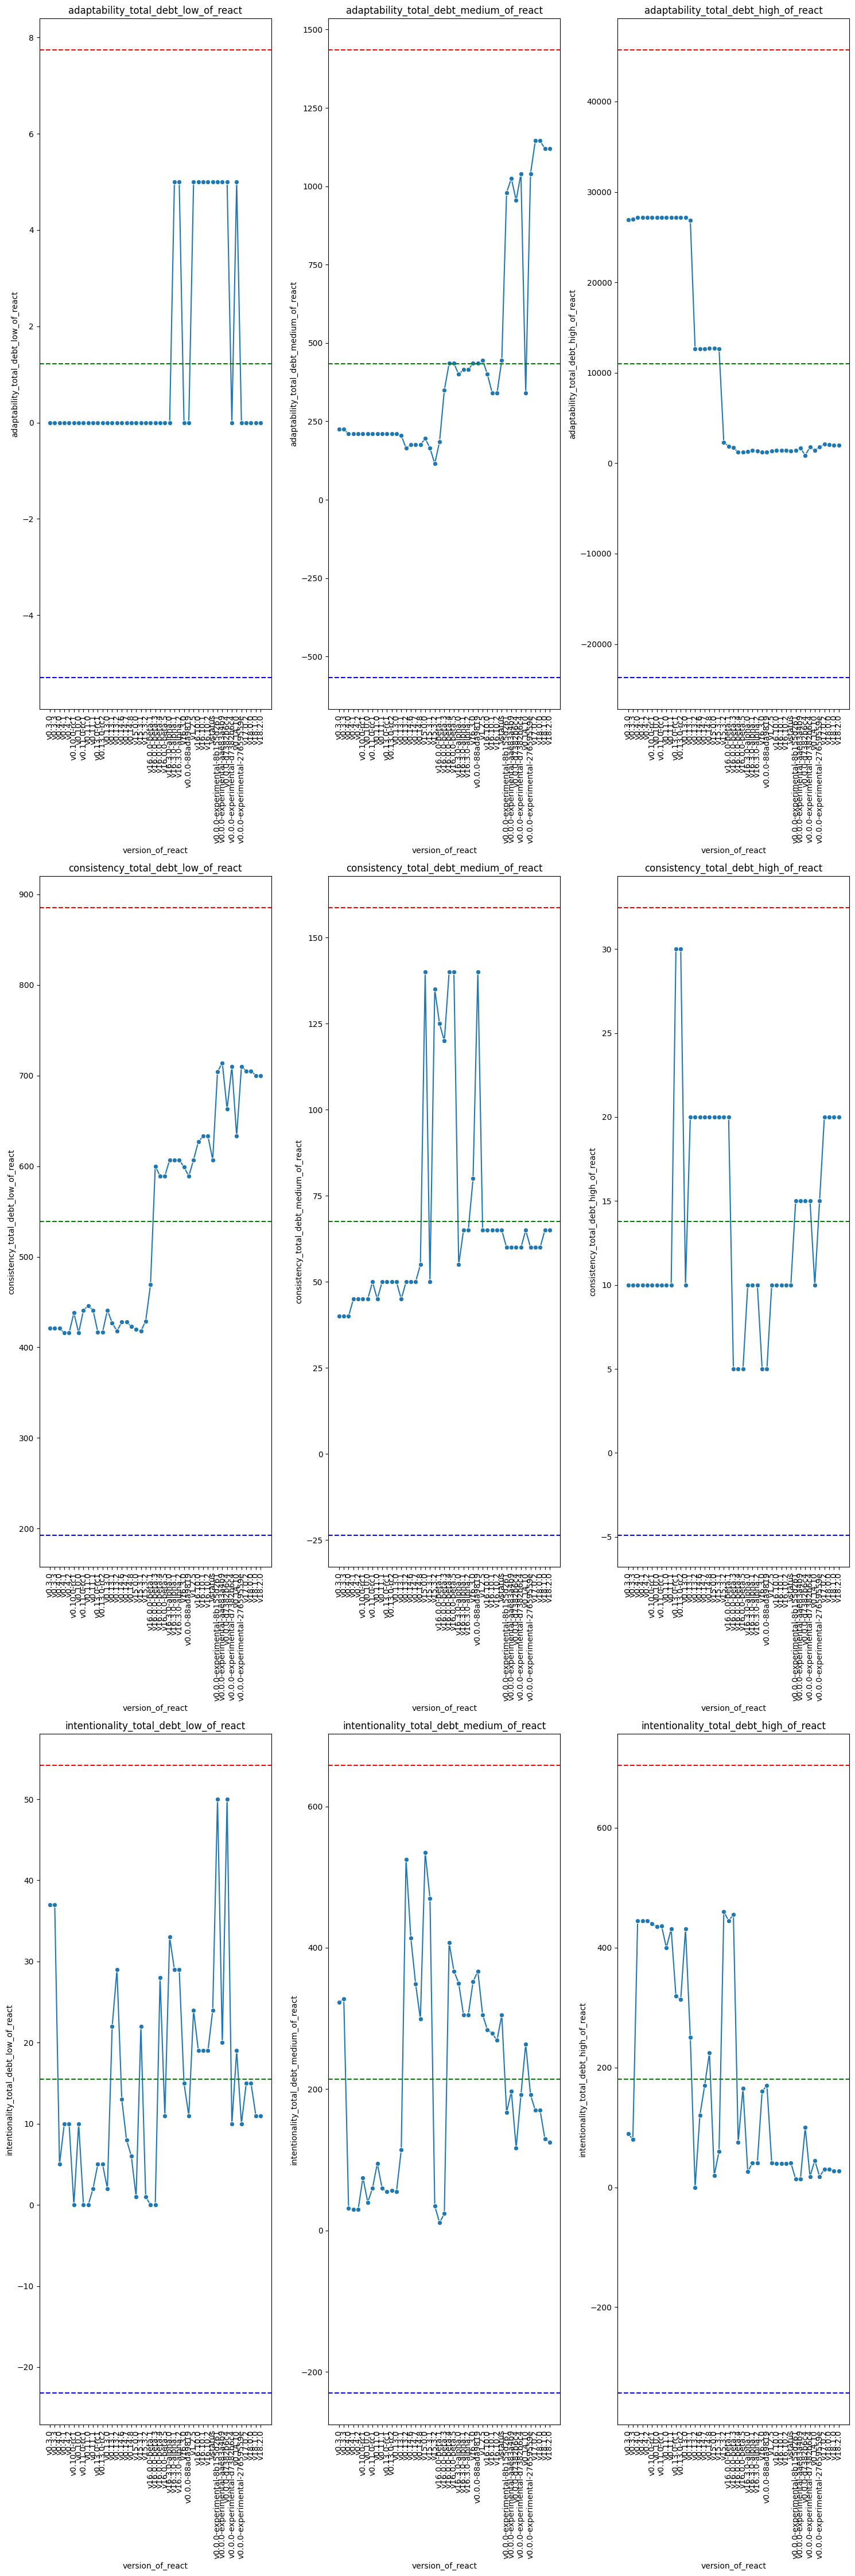

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

def plot_control_charts(df, columns, version_col):
    num_plots = len(columns)
    num_rows = 3
    num_cols = 3

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15*num_rows))

    # Create line plots
    for i, col in enumerate(columns):
        row = i // num_cols
        col_idx = i % num_cols

        # Calculate mean and standard deviation for each column
        mean = df[col].mean()
        std = df[col].std()

        # Calculate LCL and UCL for each column
        lcl = mean - 3*std
        ucl = mean + 3*std

        # Plot the data
        sns.lineplot(x=version_col, y=col, data=df, ax=axs[row, col_idx], marker ='o')
        axs[row, col_idx].axhline(lcl, color='b', linestyle='--')
        axs[row, col_idx].axhline(ucl, color='r', linestyle='--')
        axs[row, col_idx].axhline(mean, color='g', linestyle='--')
        axs[row, col_idx].set_title(col)
        axs[row, col_idx].set_xticklabels(axs[row, col_idx].get_xticklabels(), rotation=90)

    plt.tight_layout()
    plt.show()

# Usage:
plot_control_charts(df, ['adaptability_total_debt_low_of_react', 'adaptability_total_debt_medium_of_react', 'adaptability_total_debt_high_of_react', 'consistency_total_debt_low_of_react', 'consistency_total_debt_medium_of_react', 'consistency_total_debt_high_of_react', 'intentionality_total_debt_low_of_react','intentionality_total_debt_medium_of_react', 'intentionality_total_debt_high_of_react'], 'version_of_react')